Calculate event rate of generalized Yukawa scattering using Born approximation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from rate_massless_mediator import *

In [2]:
def dR_dq_born(mx, mphi, alpha, q, vlist, R):
    dsigdomega = dsig_domega_born(mx, mphi, alpha, q, R, point_charge=False)

    ss = np.empty(shape=(vlist.size, q.size))
    for i, v in enumerate(vlist):
        p = mx * v
        dsigdq = ( 2 * np.pi * q / (p**2) ) * dsigdomega
        
        # Cut off unphysical large momentum transfer
#         dsigdq[q > 2 * p] = 0

        ss[i] = dsigdq
    
    int_vec = rhoDM / mx * vlist * f_halo(vlist)
    drdq = np.empty_like(q)
    for i in range(q.size):
        drdq[i] = np.trapz( int_vec * dsigdq.T[i], x=vlist )
        
    conv_fac = hbarc**2 * 1e9 * 3e10 * 1e-8 * 3600  # natural units -> um^2/GeV, c [cm/s], um^2/cm^2, s/hr

    # Counts/hour/GeV
    return drdq * conv_fac

In [3]:
def calc_event_rate_born(R_um, mphi, mx_gev, alpha_t):
    R = R_um / hbarc       # Sphere radius, eV^-1
    N_T = 0.5 * ( 4/3 * np.pi * (R_um*1e-6)**3 ) * rho_T / mAMU
    
    mx = mx_gev * 1e9      # DM mass, eV
    alpha = alpha_t * N_T 
    
    nq = 20000
    pmax = np.min([10 * vesc * mx, 10 * alpha / (R * vmin)])
    q_lin  = np.linspace(1, 2*pmax*1.1, nq)
    
    nvels = 2000
    vlist = np.linspace(vmin, vesc, nvels)
    
    drdq = dR_dq_born(mx, mphi, alpha, q_lin, vlist, R)
    
    # GeV, Counts/hour/GeV
    return q_lin/1e9, drdq

In [19]:
def get_nevents(q, drdq, q_thr, exposure, project_z=True):
    # <|cos(theta)|> = 0.5 if q is isotropic
    # so total `q` would look half as small in the z direction
    if project_z:
        q = q * 0.5
        
    drdq[q < q_thr] = 0
    total_rate = np.trapz(drdq, q)
    
    # Exposure in hours
    return total_rate * exposure

In [36]:
def interp_log(alpha_n, events):
    if alpha_n.size == 0:
        return np.asarray([]), np.asarray([])
    
    alpha_log  = np.log10(alpha_n)
    events_log = np.log10(events)
    
    alpha_interp  = np.linspace(alpha_log[0], alpha_log[-1], 50000)
    events_interp = np.interp(alpha_interp, alpha_log, events_log)
    
    return np.power(10, alpha_interp), np.power(10, events_interp)

def get_limit(mx, alpha_n, events):
    cl = 3.0  # 95% CL without background
    
    alpha_lim = np.empty_like(mx)
    
    # Solve for coupling for each DM mass where `events` = cl
    for i, m in enumerate(mx):
        events_mx = events[i]
        
        if np.max(events_mx) < 1e-2:
            alpha_lim[i] = np.nan

        else:
            # Solve by interpolation in log scale
            events_log = np.log10(events_mx)
            alpha_log  = np.log10(alpha_n)
            
            alpha_lim_log  = np.interp(np.log10(cl), events_log, alpha_log)
            alpha_lim[i] = np.power(10, alpha_lim_log)
            
            if (alpha_lim[i] > 1e-4 or alpha_lim[i] == 1e-4):
                alpha_lim[i] = np.nan
                
    return interp_log(mx[~np.isnan(alpha_lim)], alpha_lim[~np.isnan(alpha_lim)])

In [28]:
npts = 20

R_um = 0.0075   # nanospheres; 7.5 nm
mphi = 100      # eV
mx_gev = np.logspace(-6, 1, npts)
alpha_t = np.logspace(-10, -4, npts)

q_thr = 100/1e9
exposure = 24 * 30 # 1 sphere - month

events = np.empty((mx_gev.size, alpha_t.size))

for i, m in enumerate(mx_gev):
    for j, a in enumerate(alpha_t):
        qq, drdq = calc_event_rate_born(R_um, mphi, m, a)
        events[i, j] = get_nevents(qq, drdq, q_thr, exposure, True)

0, 0
0, 1
0, 2
0, 3
0, 4
0, 5
0, 6
0, 7
0, 8
0, 9
0, 10
0, 11
0, 12
0, 13
0, 14
0, 15
0, 16
0, 17
0, 18
0, 19
1, 0
1, 1
1, 2
1, 3
1, 4
1, 5
1, 6
1, 7
1, 8
1, 9
1, 10
1, 11
1, 12
1, 13
1, 14
1, 15
1, 16
1, 17
1, 18
1, 19
2, 0
2, 1
2, 2
2, 3
2, 4
2, 5
2, 6
2, 7
2, 8
2, 9
2, 10
2, 11
2, 12
2, 13
2, 14
2, 15
2, 16
2, 17
2, 18
2, 19
3, 0
3, 1
3, 2
3, 3
3, 4
3, 5
3, 6
3, 7
3, 8
3, 9
3, 10
3, 11
3, 12
3, 13
3, 14
3, 15
3, 16
3, 17
3, 18
3, 19
4, 0
4, 1
4, 2
4, 3
4, 4
4, 5
4, 6
4, 7
4, 8
4, 9
4, 10
4, 11
4, 12
4, 13
4, 14
4, 15
4, 16
4, 17
4, 18
4, 19
5, 0
5, 1
5, 2
5, 3
5, 4
5, 5
5, 6
5, 7
5, 8
5, 9
5, 10
5, 11
5, 12
5, 13
5, 14
5, 15
5, 16
5, 17
5, 18
5, 19
6, 0
6, 1
6, 2
6, 3
6, 4
6, 5
6, 6
6, 7
6, 8
6, 9
6, 10
6, 11
6, 12
6, 13
6, 14
6, 15
6, 16
6, 17
6, 18
6, 19
7, 0
7, 1
7, 2
7, 3
7, 4
7, 5
7, 6
7, 7
7, 8
7, 9
7, 10
7, 11
7, 12
7, 13
7, 14
7, 15
7, 16
7, 17
7, 18
7, 19
8, 0
8, 1
8, 2
8, 3
8, 4
8, 5
8, 6
8, 7
8, 8
8, 9
8, 10
8, 11
8, 12
8, 13
8, 14
8, 15
8, 16
8, 17
8, 18
8, 19
9, 0
9, 1


/tmp/ipykernel_3479/989590489.py:3: RuntimeWarning: divide by zero encountered in log
  plt.contourf(mx_gev, alpha_t, np.log(events.T), vmax=vmax, vmin=vmin)


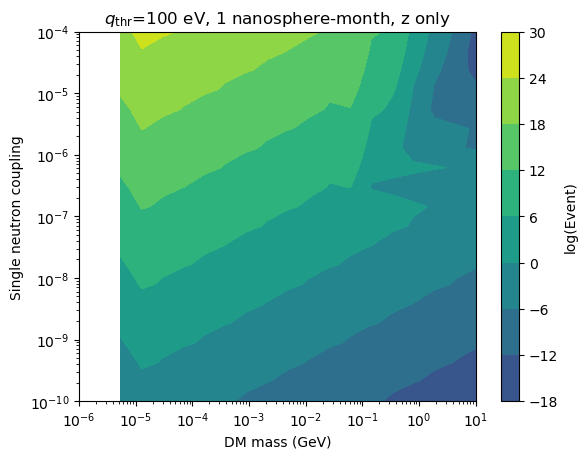

In [41]:
vmax, vmin = 32, -32

plt.contourf(mx_gev, alpha_t, np.log(events.T), vmax=vmax, vmin=vmin)

plt.xscale('log')
plt.yscale('log')

plt.title(r'$q_{\mathrm{thr}}$=100 eV, 1 nanosphere-month, z only', fontsize=12)
plt.xlabel('DM mass (GeV)')
plt.ylabel('Single neutron coupling')
plt.colorbar(label='log(Event)')

Text(0, 0.5, 'Single neutron coupling')

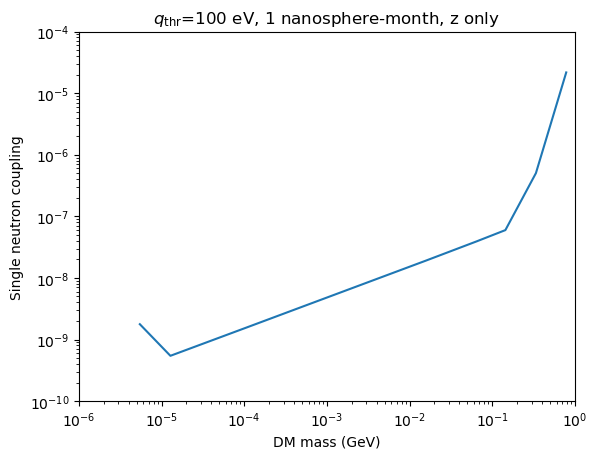

In [47]:
lim = get_limit(mx_gev, alpha_t, events)

plt.loglog(lim[0], lim[1])

plt.xlim(1e-6, 1)
plt.ylim(1e-10, 1e-4)

plt.title(r'$q_{\mathrm{thr}}$=100 eV, 1 nanosphere-month, z only', fontsize=12)
plt.xlabel('DM mass (GeV)')
plt.ylabel('Single neutron coupling')